In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score

import warnings 
warnings.filterwarnings('ignore')

In [7]:
# Эта метрика отсутствует в библиотеке, пропишем вручную - Mean Error
def ME(y, y_pred):
    return np.mean(y_pred - y)

In [8]:
df=pd.read_excel('BST_DataSet.xlsx')

In [9]:
df.tail()

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.0,168.418880,8034.188296,39275.911028,59.65,37099
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.0,168.166250,8066.772110,39419.314228,57.73,38047
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.5,168.502590,8089.527215,39570.988535,57.71,38333
82,2017-11-01,NaN,7.381429,8.25,0.64,5.18,63.1,168.852459,8071.528889,39667.451690,58.92,38848
83,2017-12-01,NaN,6.978095,7.75,0.73,5.27,64.9,169.560950,8073.942148,40114.408278,58.59,50500


In [10]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, млрд руб          

In [13]:
df.describe()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,7.200000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1.466405e+05,7.875670,9.130952,2.184643,6.233929,83.118095,136.725747,6589.289050,29838.955891,45.288690,31877.130952
std,2.593857e+05,2.195040,2.214233,1.108624,1.733394,30.069987,22.413867,844.915477,5984.722501,15.539177,6029.179510
min,-5.674480e+05,4.558571,5.500000,0.520000,4.000000,30.800000,106.171510,4830.700000,19307.700000,27.870000,20669.000000
25%,1.949025e+04,6.228064,8.000000,1.510000,5.292500,51.992500,116.118345,5976.075000,24443.050000,31.345000,26830.750000
50%,1.129245e+05,7.475455,8.250000,2.230000,5.755000,99.630000,131.183355,6667.511360,30106.850000,35.885000,32355.500000
75%,2.360528e+05,9.332238,10.125000,2.900000,6.657500,110.185000,160.386900,7188.388730,34793.453636,59.742500,35772.500000
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000,124.930000,169.560950,8089.527215,40114.408278,77.220000,50500.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


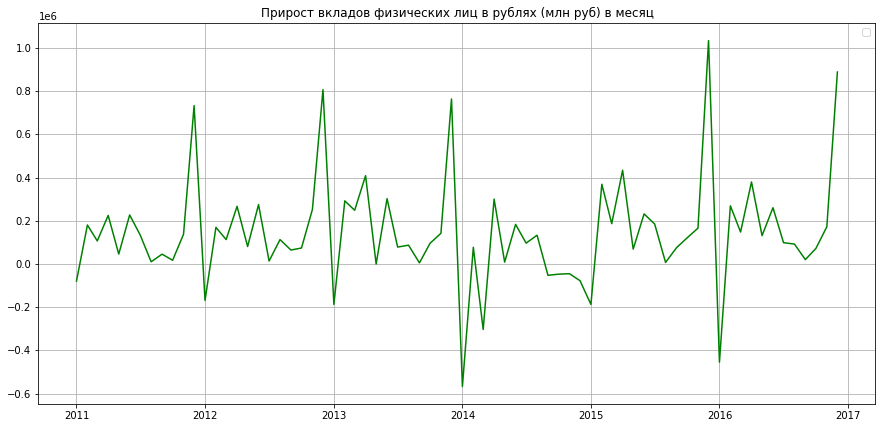

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(df['date'],df['Прирост вкладов физических лиц в рублях (млн руб)'], color='g')
plt.title('Прирост вкладов физических лиц в рублях (млн руб) в месяц')
plt.legend()
plt.grid(True)

<AxesSubplot: xlabel='Прирост вкладов физических лиц в рублях (млн руб)', ylabel='Density'>

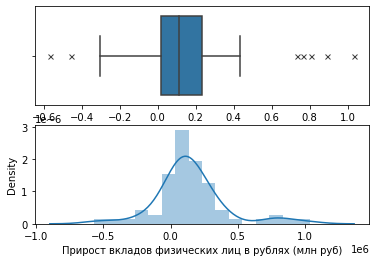

In [15]:
# Посмотрим распределение прироста вкладов лиц, близко к нормальному
pic, axes = plt.subplots(2,1)
sns.boxplot(df['Прирост вкладов физических лиц в рублях (млн руб)'], flierprops={"marker": "x"}, ax=axes[0])
sns.distplot(df['Прирост вкладов физических лиц в рублях (млн руб)'], ax=axes[1])

In [16]:
df['month'] = df['date'].dt.month

In [17]:
df['year']=df['date'].dt.year

In [18]:
df['m_in_w_cos'] = np.cos(df['month'] * 2 * math.pi / 12)  

In [19]:
df['m_in_w_sin'] = np.sin(df['month'] * 2 * math.pi / 12)  

In [107]:
# Отделим данные для предсказания
df_nan = df[df['Прирост вкладов физических лиц в рублях (млн руб)'].isna()]
df_train=df[~df['Прирост вкладов физических лиц в рублях (млн руб)'].isna()]

In [21]:
# Поделим данные на предикаты и целевую переменную
X=df_train.drop(['Прирост вкладов физических лиц в рублях (млн руб)', 'date'], axis=1)

In [22]:
y=df_train[['Прирост вкладов физических лиц в рублях (млн руб)']]

In [23]:
# Поделим данные на тестовые и тренировочные наборы
X_train = X[X.year <= 2015]
y_train = y[:X[X.year <= 2015].index[-1]+1]

In [24]:
X_test = X[X.year > 2015]
y_test = y[X[X.year > 2015].index[0]:]

# Наивная модель

Создадим наивную модель, предполагающую, что прирост будет таким же как в предыдущем месяце

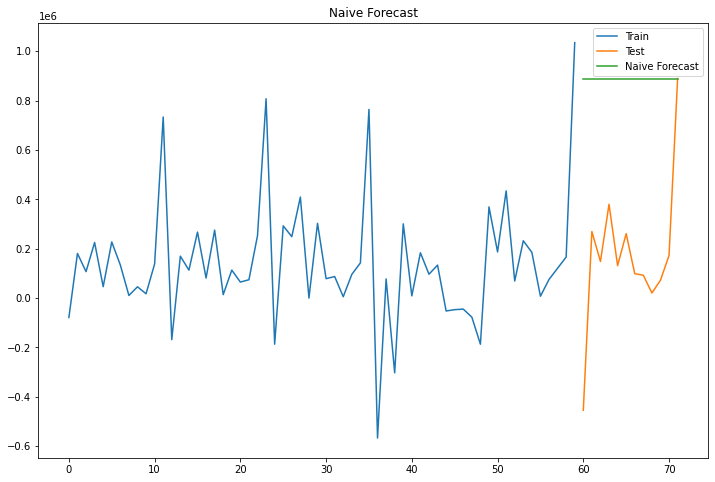

In [31]:
pred = y_test.copy()
pred['pred'] = pred[pred.index==pred.index[-1]]['Прирост вкладов физических лиц в рублях (млн руб)'].values[0]
plt.figure(figsize=(12,8))
plt.plot(X_train.index, y_train, label='Train')
plt.plot(pred.index,pred['Прирост вкладов физических лиц в рублях (млн руб)'], label='Test')
plt.plot(pred.index,pred['pred'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [32]:
real=pred[['Прирост вкладов физических лиц в рублях (млн руб)']].values
prediction=pred[['pred']].values
print(f"R^2 predict score {r2_score(real, prediction)}")

rmse = mean_squared_error(real, prediction)
print(f"RMSE: {rmse}")

mape = mean_absolute_percentage_error(real, prediction)
print(f"MAPE: {mape}")

mae = mean_absolute_error(real, prediction)
print(f"MAE: {mae}")

me = ME(real, prediction)
print(f"ME: {me}")

R^2 predict score -6.061574560737819
RMSE: 597034722365.5
MAPE: 7.901821768171504
MAE: 715882.5
ME: 715882.5


# Самая простая модель на основных данных

In [35]:
model_simple_LR = LinearRegression()
model_simple_LR.fit(X_train, y_train)

LinearRegression()

<AxesSubplot: >

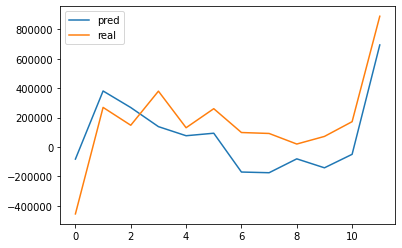

In [36]:
pred_simple_LR = pd.DataFrame({'pred': model.predict(X_test).flatten(),
                     'real': np.array(y_test).flatten()})
pred_simple_LR.plot()

In [37]:
print(f"R^2 predict score:{model_simple_LR.score(X_test, y_test)}")

rmse = mean_squared_error(pred_simple_LR[['real']].values, pred_simple_LR[['pred']].values)
print(f"RMSE: {rmse}")

mape = mean_absolute_percentage_error(pred_simple_LR[['real']].values, pred_simple_LR[['pred']].values)
print(f"MAPE: {mape}")

mae = mean_absolute_error(pred_simple_LR[['real']].values, pred_simple_LR[['pred']].values)
print(f"MAE: {mae}")

me = ME(pred_simple_LR[['real']].values, pred_simple_LR[['pred']].values)
print(f"ME: {me}")

R^2 predict score:0.46655588930354486
RMSE: 45101082455.17027
MAPE: 1.5661847619799978
MAE: 194481.53736354908
ME: -93681.06862137716


In [38]:
# Объединим обучение и предсказание в функцию
def predict_with_metrics(model, X_train: pd.DataFrame(), y_train: pd.DataFrame(), X_test: pd.DataFrame(), y_test: pd.DataFrame())->pd.DataFrame():
    """
    Function for LR model creation, fitting and prediction with the necessary calculation of metrics.
    """
    model.fit(X_train, y_train)
    
    pred = pd.DataFrame({'pred': model.predict(X_test).flatten(),
                     'real': np.array(y_test).flatten()})
    pred.plot()
    
    print(f"R^2 predict score:{model.score(X_test, y_test)}")

    rmse = mean_squared_error(pred[['real']].values, pred[['pred']].values)
    print(f"RMSE: {rmse}")

    mape = mean_absolute_percentage_error(pred[['real']].values, pred[['pred']].values)
    print(f"MAPE: {mape}")

    mae = mean_absolute_error(pred[['real']].values, pred[['pred']].values)
    print(f"MAE: {mae}")

    me = ME(pred[['real']].values, pred[['pred']].values)
    print(f"ME: {me}")
    
    return pred

Уберем коррелирующие столбцы

In [39]:
# Посмотрим на матрицу коррелции предикатов и уберем коллинеарые столбцы (>0.8)
X.corr()

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year,m_in_w_cos,m_in_w_sin
Доходность ОФЗ по сроку до 1 года,1.000000,0.868058,0.104107,0.914757,-0.830436,0.798182,0.700279,0.723971,0.833531,0.651659,4.721458e-02,7.787173e-01,1.061734e-01,-7.618485e-03
Ключевая ставка,0.868058,1.000000,0.345412,0.900468,-0.744765,0.617396,0.397302,0.454770,0.721729,0.439797,-6.310129e-02,5.455245e-01,3.122196e-02,1.227663e-01
Ставка по вкладам в долларах до 1 года,0.104107,0.345412,1.000000,0.365788,0.274273,-0.431177,-0.441443,-0.477324,-0.301627,-0.349465,-2.434279e-01,-4.257124e-01,1.202374e-01,3.172329e-01
Ставка по вкладам в рублях до 1 года,0.914757,0.900468,0.365788,1.000000,-0.719093,0.648779,0.548631,0.577889,0.715076,0.557171,-6.257321e-02,6.366741e-01,1.500587e-01,1.465120e-01
"Нефть марки Юралс, долл./барр",-0.830436,-0.744765,0.274273,-0.719093,1.000000,-0.935437,-0.712399,-0.805572,-0.985024,-0.685827,-7.499373e-02,-8.601124e-01,-9.068598e-02,5.291618e-02
"Индекс потребительских цен, ед.",0.798182,0.617396,-0.431177,0.648779,-0.935437,1.000000,0.869445,0.944841,0.949687,0.809610,1.190699e-01,9.704002e-01,1.863150e-02,-8.445448e-02
"М0, млрд руб",0.700279,0.397302,-0.441443,0.548631,-0.712399,0.869445,1.000000,0.975817,0.746058,0.816236,1.220132e-01,9.401872e-01,5.972893e-02,-1.435599e-01
"М2, млрд руб",0.723971,0.454770,-0.477324,0.577889,-0.805572,0.944841,0.975817,1.000000,0.834898,0.839137,9.451132e-02,9.852597e-01,2.778218e-02,-9.107743e-02
"Курс доллара к рублю, руб",0.833531,0.721729,-0.301627,0.715076,-0.985024,0.949687,0.746058,0.834898,1.000000,0.701793,5.653146e-02,8.867405e-01,1.055744e-01,-3.135238e-02
"Номинальная средняя з/п, руб",0.651659,0.439797,-0.349465,0.557171,-0.685827,0.809610,0.816236,0.839137,0.701793,1.000000,3.781221e-01,8.046141e-01,1.148134e-01,-7.944408e-02


In [40]:
appropriate_corr_coefficient=0.7

In [41]:
corr_columns=X.corr()[X.corr()['Доходность ОФЗ по сроку до 1 года']>appropriate_corr_coefficient].index

In [42]:
X_train=X_train.drop(columns=corr_columns, axis=1)
X_test=X_test.drop(columns=corr_columns, axis=1)

R^2 predict score:0.6861362329429065
RMSE: 26536230045.26385
MAPE: 0.5653557602251424
MAE: 124742.79781698441
ME: -5730.385174027489


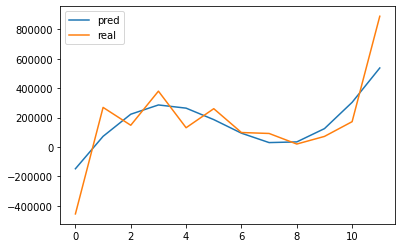

In [43]:
model_without_multicol_LR = LinearRegression()
pred_without_multicol = predict_with_metrics(model,X_train,y_train,X_test,y_test)

Используем кросс-валидацию

In [44]:
df_train_without_multicol=df_train.drop(columns=corr_columns, axis=1)

In [45]:
# date - первая дата для предсказания, берется отрезок от date, увеличивается на month_delta и повторяется n раз 
def crossValScore(model, df_train, n, test_part_percent):
    # вектор ошибок
    rmse_errors = []
    R2_errors = []
    mape_errors = []
    mae_errors = []
    me_errors = []
       
    df_len=df_train.shape[0]    
    iteration_len=df_len//n    
 
    test_end=iteration_len
    test_len=test_end*test_part_percent//100   
    test_start=test_end-test_len
    
    for i in range(n):                
        X_train_crop = df_train[0:test_start].drop(['Прирост вкладов физических лиц в рублях (млн руб)', 'date'], axis=1)
        y_train_crop = df_train[0:test_start][['Прирост вкладов физических лиц в рублях (млн руб)']]
        X_test_crop = df_train[test_start:test_end].drop(['Прирост вкладов физических лиц в рублях (млн руб)', 'date'], axis=1)
        y_test_crop = df_train[test_start:test_end][['Прирост вкладов физических лиц в рублях (млн руб)']]    

        model.fit(X_train_crop, y_train_crop)
        predictions = model.predict(X_test_crop)
        pred = pd.DataFrame({'pred': predictions.flatten(), 'real':np.array(y_test_crop).flatten()})
        pred.plot()
        plt.title(f"Предсказание с {test_start} по {test_end}")
                
        R2 = model.score(X_test_crop, y_test_crop)
        R2_errors.append(R2)
        
        rmse = mean_squared_error(predictions, y_test_crop, squared=False)
        rmse_errors.append(rmse)
        
        mape = mean_absolute_percentage_error(pred[['real']].values, pred[['pred']].values)
        mape_errors.append(mape)        
        
        mae = mean_absolute_error(pred[['real']].values, pred[['pred']].values)
        mae_errors.append(mae)            
        
        me = ME(pred[['real']].values, pred[['pred']].values)
        me_errors.append(me)     
        
        test_end+=iteration_len
        test_len=test_end*test_part_percent//100   
        test_start=test_end-test_len

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    print(f"Mean R^2: {np.mean(np.array(R2_errors))}; \
              Mean RMSE: {np.mean(np.array(rmse_errors))}; \
              Mean MAPE: {np.mean(np.array(mape_errors))}; \
              Mean MAE: {np.mean(np.array(mae_errors))}; \
              Mean ME: {np.mean(np.array(me_errors))}.")

In [46]:
model_cross_val=LinearRegression()

Mean R^2: -0.6218124461455102;               Mean RMSE: 324340.056126651;               Mean MAPE: 3.6412482776761887;               Mean MAE: 259394.01267935988;               Mean ME: -95881.3800368315.


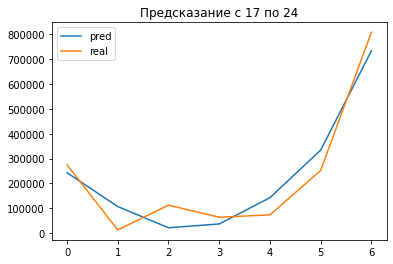

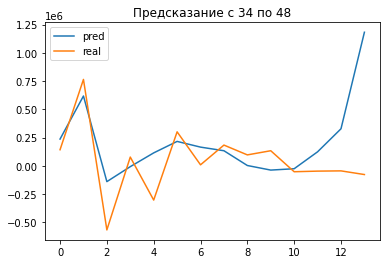

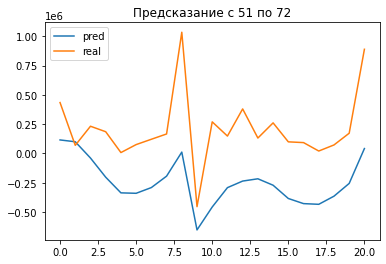

In [47]:
crossValScore(model_cross_val, df_train_without_multicol, 3, 30)

Попробуем XGBoost

In [48]:
from xgboost import XGBRegressor

In [49]:
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10)

In [50]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [51]:
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 149246.253 (64353.601)


In [52]:
model_xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

R^2 predict score:0.809022192119958
RMSE: 16146594718.348398
MAPE: 0.8016253557120293
MAE: 100246.52994791667
ME: 4813.51953125


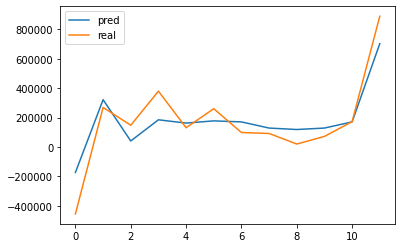

In [53]:
pred_without_multicol_xgbr = predict_with_metrics(model_xgbr,X_train,y_train,X_test,y_test)

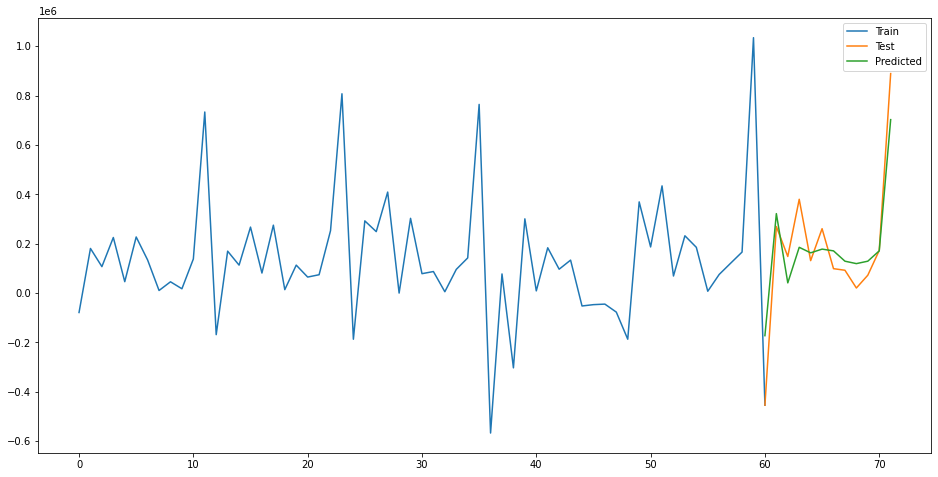

In [55]:
plt.figure(figsize=(16,8))
plt.plot(df_train[['Прирост вкладов физических лиц в рублях (млн руб)']][0:61], label='Train')
plt.plot(list(range(60,72)),pred_without_multicol_xgbr['real'], label='Test')
plt.plot(list(range(60,72)),pred_without_multicol_xgbr['pred'], label='Predicted')
plt.legend(loc='best')
plt.show()

# SARIMA

In [56]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

In [57]:
desc = df_train.describe()

In [58]:
std=desc[desc.index=='std']['Прирост вкладов физических лиц в рублях (млн руб)'].values[0]
mean=desc[desc.index=='mean']['Прирост вкладов физических лиц в рублях (млн руб)'].values[0]

In [59]:
print(f'Коэффициент вариации: {std/mean}')

Коэффициент вариации: 1.768854401577019


In [60]:
#  Проведем тест Харки — Бера для определения номарльности распределения, чтобы подтвердить предположение об однородности
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(df_train['Прирост вкладов физических лиц в рублях (млн руб)'])
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)
# p-value меньше 0.05 следовательно можно считать нормальным распределение

        JB                p-value                skew             kurtosis    
------------------------------------------------------------------------------
34.849845144194624 2.7067757647181773e-08 0.8714546870789435 5.928972850938949
------------------------------------------------------------------------------


In [61]:
# для проверки проверки стационарности проведем обобщенный тест Дикки-Фуллера 
def diki_fuller(data_):
    test = sm.tsa.adfuller(data_)
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')

In [62]:
diki_fuller(df_train['Прирост вкладов физических лиц в рублях (млн руб)'])

adf:  -1.5624513827398352
p-value:  0.5024228765613977
Critical values:  {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
есть единичные корни, ряд не стационарен


In [63]:
data=df_train['Прирост вкладов физических лиц в рублях (млн руб)']

In [64]:
# определим порядок интегрированного ряда для нашего ряда
data_diff = data.diff(periods=1).dropna()
diki_fuller(data_diff)

adf:  -3.1388980093116494
p-value:  0.023805306778601716
Critical values:  {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
единичных корней нет, ряд стационарен


<AxesSubplot: >

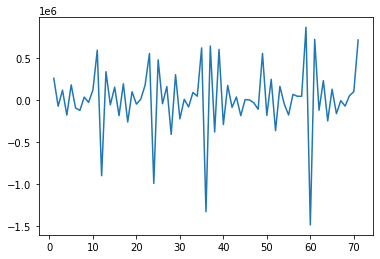

In [65]:
# убедимся в отсутствии тренда для нового ряда
data_diff.plot()

Таким образом исходный ряд - интегрированный ряд первого порядка

In [66]:
# Тогда можем опеределить параметр d - порядок интегрированного ряда
d = 1

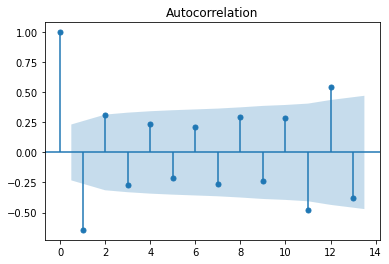

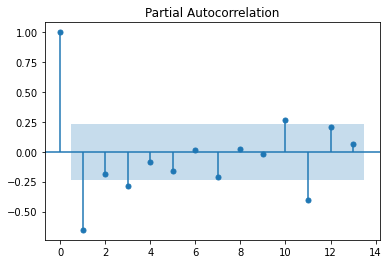

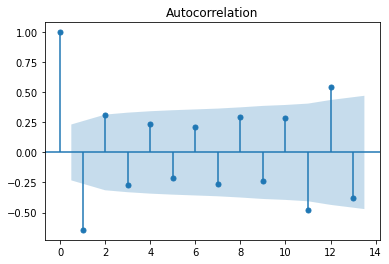

In [67]:
# Для нахождения p q построим авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей
sm.graphics.tsa.plot_pacf(data_diff, lags=13)
sm.graphics.tsa.plot_acf(data_diff.values.squeeze(), lags=13)

In [68]:
# По PACF делаем вывод, что p=4, т.к. 4 выбросa сильно отличных от нуля
p=3
# q=1 т.к. после лага 1 знчение функции резко падает
q=1

Перейдем к определению параметров сезонности

In [69]:
# избавимся от сезонности -  возьмем сезонную разность предыдущего разностного ряда (данные по месяцам след-но 12)
data_diff_season = data_diff.diff(12).dropna()
data_diff_season_diff = data_diff_season.diff(periods=2).dropna()

In [70]:
print('p.value: %f' % sm.tsa.adfuller(data_diff_season_diff, maxlag=12)[1])

p.value: 0.037386


In [71]:
# т.к. D определяет порядок интегрированности сезонной разности то он равен 2
D=2

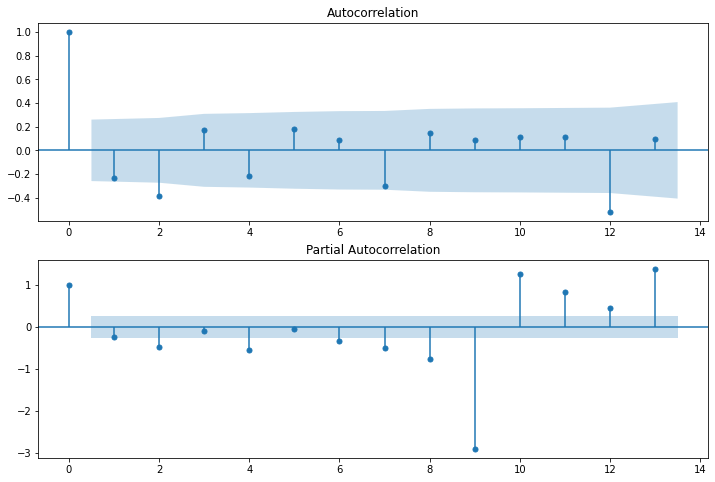

In [72]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff_season_diff.values.squeeze(), lags=13, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff_season_diff, lags=13, ax=ax2)

In [73]:
#  В нашем случае параметры P и Q смотрятся на лагах кратных 12
P=5
Q=12

In [74]:
time_data=df_train.copy()
time_data=time_data.set_index('date')[['Прирост вкладов физических лиц в рублях (млн руб)']]

In [75]:
time_data_input=time_data[['Прирост вкладов физических лиц в рублях (млн руб)']]

In [76]:
model_SARIMAX=sm.tsa.statespace.SARIMAX(time_data_input[0:60], order=(p, d, q),seasonal_order=(P,D,Q,12)).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [77]:
time_data['SARIMA'] = model_SARIMAX.predict(start='2016-01-01', end='2016-12-01',dynamic=True)

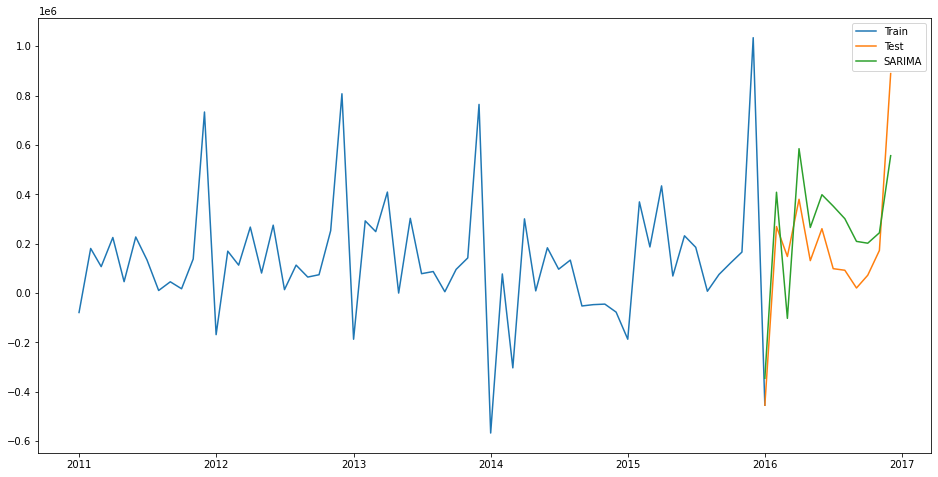

In [78]:
plt.figure(figsize=(16,8))
plt.plot(time_data[['Прирост вкладов физических лиц в рублях (млн руб)']][0:61], label='Train')
plt.plot(time_data[['Прирост вкладов физических лиц в рублях (млн руб)']][60:], label='Test')
plt.plot(time_data['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [79]:
y_real=time_data_input[60:]['Прирост вкладов физических лиц в рублях (млн руб)'].values
y_pred=time_data['SARIMA'][60:].values

print(f"R^2 predict score:{r2_score(y_real, y_pred)}")

rmse = mean_squared_error(y_real, y_pred)
print(f"RMSE: {rmse}")

mape = mean_absolute_percentage_error(y_real, y_pred)
print(f"MAPE: {mape}")

mae = mean_absolute_error(y_real, y_pred)
print(f"MAE: {mae}")

me = ME(y_real, y_pred)
print(f"ME: {me}")

R^2 predict score:0.5570386401804035
RMSE: 37451040161.63004
MAPE: 1.7740143836701743
MAE: 180125.17852524653
ME: 82888.32118039487


# Вывод

Таким образом лучше всего себя показали модели XGBoost и SARIMA. 
XGBoost имеет высокий коэффициент детерминации, но при это ошибка предсказания достаточно велика.
SARIMA лучше уловила изменения в сезонности, однако она имеет худшие метрики.
Обе модели есть куда улучшать: для SARIMA можно рассчитать матрицу пааметров и подобрать более оптимальные значения.
В XGBoost можно также донастроить гиперпараметры, а также стоит тщательнее обработать предикаты.

In [114]:
y_train_result=df_train[['Прирост вкладов физических лиц в рублях (млн руб)']]
y_test_result=df_nan[['Прирост вкладов физических лиц в рублях (млн руб)']]

X_train_result=df_train.drop(columns=['date','Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)
X_test_result=df_nan.drop(columns=['date','Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)

In [115]:
X_train_result=X_train_result.drop(columns=corr_columns, axis=1)
X_test_result=X_test_result.drop(columns=corr_columns, axis=1)

In [116]:
# Для предсказания данных за 2017 год возьмем модель xgboost
model_xgbr_result = XGBRegressor(objective ='reg:squarederror', n_estimators = 10)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_result, y_train_result, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [117]:
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 146223.836 (51844.736)


In [119]:
model_xgbr_result.fit(X_train_result,y_train_result)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [122]:
# Получим следующее предсказание на 2017 год
model_xgbr_result.predict(X_test_result)

array([-433532.72 ,  210361.31 ,  162972.67 ,  322993.34 ,  118370.516,
        196357.88 ,  128112.125,  148175.6  ,  101920.68 ,  148175.6  ,
        178670.12 ,  854920.5  ], dtype=float32)